In [1]:
# Boilerplate startup
import numpy as np
import matplotlib
matplotlib.rc('font', size=16)
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # resize plots

import hax

# If you get a ServerSelectionTimeoutError, there is a problem with your connection to the runs db
hax.init(experiment='XENON1T', 
         raw_data_access_mode = 'local',
         # Please provide the path to the raw data here
         raw_data_local_path = '/mnt/lena/xenon1t',
         # Please provide the right password here
         mongo_password='luxstinks',
)

/home/jelle/anaconda3/envs/pax/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
hax.runs.datasets.sort_values(by='number').tail()

,end,name,number,raw_data_subfolder,reader__self_trigger,source__frequency,source__type,start,tags,trigger__events_built,trigger__status,location,raw_data_found
622,2016-05-25 09:15:10,160525_0906,624,,False,1,LED,2016-05-25 09:06:24,"bad,daq-test",551,processed,,True
623,2016-05-25 09:42:56,160525_0919,625,,False,1,LED,2016-05-25 09:19:08,"daq-test,bad",1505,processed,,True
624,2016-05-25 09:54:40,160525_0943,626,,False,1,LED,2016-05-25 09:43:31,"daq-test,bad",702,processed,,True
625,2016-05-25 10:23:52,160525_1003,627,,False,1,LED,2016-05-25 10:03:57,"bad,daq-test",1259,processed,,True
626,2016-05-25 11:00:00,160525_1026,628,,False,100,LED,2016-05-25 10:26:47,standard_good,202003,processed,,True


Exploring raw PMT waveforms:

In [15]:
help(hax.raw_data.raw_events)

Help on function raw_events in module hax.raw_data:

raw_events(run_id, event_numbers=None, config_override=None)
    Yields raw event(s) numbered event_numbers from dataset numbered dataset_number
    config_override is a dictionary with extra pax options



Event 11 has 362 pulses


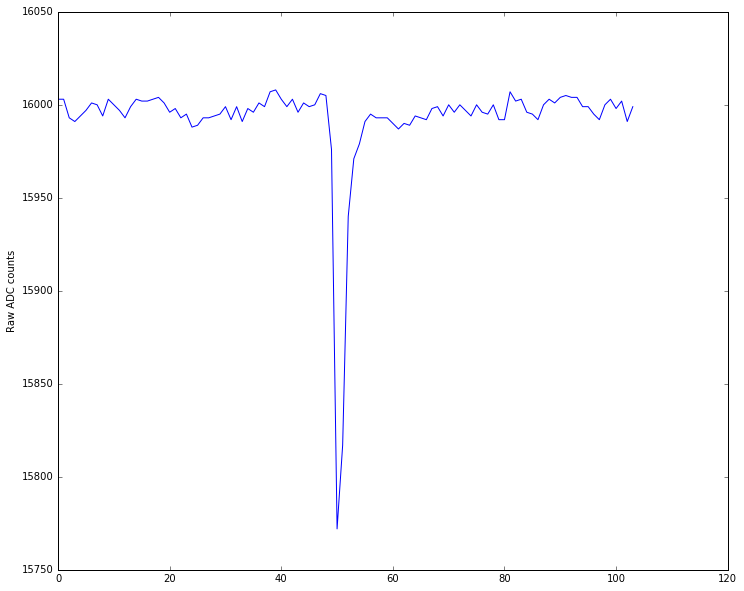

Event 12 has 477 pulses


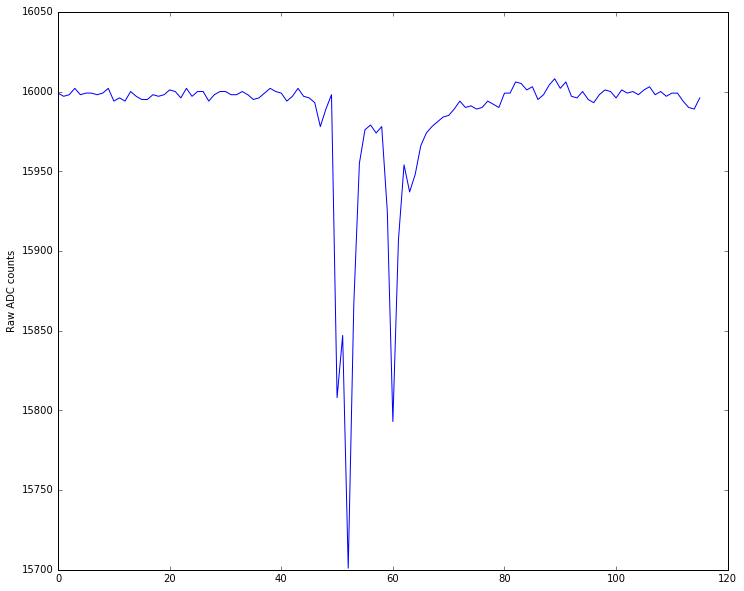

In [12]:
for event in hax.raw_data.raw_events(run_id=569, event_numbers=[11, 12]):
    print("Event %d has %d pulses" % (event.event_number, len(event.pulses)))
    # Show the first pulse
    plt.plot(event.pulses[0].raw_data)
    plt.ylabel("Raw ADC counts")
    plt.show()